In [1]:
library(nycflights13)
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Modular Arithmetic
- ```%%```: Remainder
- ```%/%```: Integer division (divide and then take the remainder)

In [2]:
# 3+3+2 = 8
8 %% 3

# 3+3 = 6
6 %% 3

# 3+1 = 4
4 %% 3

# What are the possible values for mod 3?

[1] 2

[1] 0

[1] 1

In [3]:
# number of times that 2 fits into 2.5
2.5 %/% 2

# number of times that 3 fits into 8
# 3+3+2 = 8
8 %/% 3

[1] 1

[1] 2

x =  x %/% y + x %% y

In [5]:
# departure time in terms of hours and minutes
print(transmute(flights,
  dep_time,
  hour = dep_time %/% 100,
  minute = dep_time %% 100
))

# A tibble: 336,776 x 3
   dep_time  hour minute
      <int> <dbl>  <dbl>
 1      517     5     17
 2      533     5     33
 3      542     5     42
 4      544     5     44
 5      554     5     54
 6      554     5     54
 7      555     5     55
 8      557     5     57
 9      557     5     57
10      558     5     58
# … with 336,766 more rows


We can summarize the data using the command ```summarize()``` (the British spelling ```summarise()``` also works)

In [6]:
# find the mean of all flights, removing missing values
summarize(flights, delay = mean(dep_delay, na.rm = TRUE))

delay
12.63907


In [7]:
flights %>%
  summarize(delay = mean(dep_delay, na.rm = TRUE))

delay
12.63907


The ```summarize()``` command is most useful when paired with ```group_by()```.

In [8]:
# create a dataframe with an inherent grouping
# all flights with the same year, month, and day value are in the same group
by_day <- group_by(flights, year, month, day)
print(by_day)

# A tibble: 336,776 x 19
# Groups:   year, month, day [365]
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      533            529         4      850            830
 3  2013     1     1      542            540         2      923            850
 4  2013     1     1      544            545        -1     1004           1022
 5  2013     1     1      554            600        -6      812            837
 6  2013     1     1      554            558        -4      740            728
 7  2013     1     1      555            600        -5      913            854
 8  2013     1     1      557            600        -3      709            723
 9  2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753        

In [9]:
# this is the mean delay for each group (mean delay for each year, month, day value)
summarize(by_day, delay = mean(dep_delay, na.rm = TRUE))

year,month,day,delay
2013,1,1,11.548926
2013,1,2,13.858824
2013,1,3,10.987832
2013,1,4,8.951595
2013,1,5,5.732218
2013,1,6,7.148014
2013,1,7,5.417204
2013,1,8,2.553073
2013,1,9,2.276477
2013,1,10,2.844995


In [12]:
flights %>%     #specify the dataset
  group_by(year, month, day) %>%    #then group by year, month, day
  summarize(delay = mean(dep_delay, na.rm = TRUE))     # then find the mean for each group, removing NA values

year,month,day,delay
2013,1,1,11.548926
2013,1,2,13.858824
2013,1,3,10.987832
2013,1,4,8.951595
2013,1,5,5.732218
2013,1,6,7.148014
2013,1,7,5.417204
2013,1,8,2.553073
2013,1,9,2.276477
2013,1,10,2.844995


Attempt: Which carrier has the worst average delay?

In [15]:
flights %>%
    group_by(carrier) %>%
    summarize(mean_delay = mean(dep_delay, na.rm = TRUE))
    #mutate(delay_rank = min_rank(desc(mean_delay))) %>%
    #filter(delay_rank == 1)

carrier,mean_delay
9E,16.725769
AA,8.586016
AS,5.804775
B6,13.022522
DL,9.264505
EV,19.955390
F9,20.215543
FL,18.726075
HA,4.900585
MQ,10.552041


Other useful summary statistics
-  ```n()```: Count how many data points in each group
- ```sum()```: Sum over all data points in each group

In [16]:
# How many flights are on each day?
flights %>%
  group_by(year, month, day) %>%
  summarize(count = n()) %>%
  arrange(count) %>%   # sorts it from smallest to largest
  print()

# A tibble: 365 x 4
# Groups:   year, month [12]
    year month   day count
   <int> <int> <int> <int>
 1  2013    11    28   634
 2  2013    11    29   661
 3  2013     1    19   674
 4  2013    10    12   676
 5  2013     1    26   680
 6  2013     8    31   680
 7  2013     2     2   682
 8  2013     9    28   682
 9  2013     2     9   684
10  2013    10    19   684
# … with 355 more rows


In [17]:
# total distance travelled for each carrier
carrier_dist <- flights %>%
  group_by(carrier) %>%
  summarize(total_dist = sum(distance)) %>%
  arrange(total_dist)

In [18]:
carrier_dist

carrier,total_dist
OO,16026
YV,225395
F9,1109700
HA,1704186
AS,1715028
FL,2167344
9E,9788152
US,11365778
WN,12229203
VX,12902327


In [25]:
avg_delay_origin <- flights %>%
  group_by(origin) %>%
  summarize(mean_delay = mean(dep_delay, na.rm = TRUE))
print(avg_delay_origin)

# A tibble: 3 x 2
  origin mean_delay
  <chr>       <dbl>
1 EWR          15.1
2 JFK          12.1
3 LGA          10.3


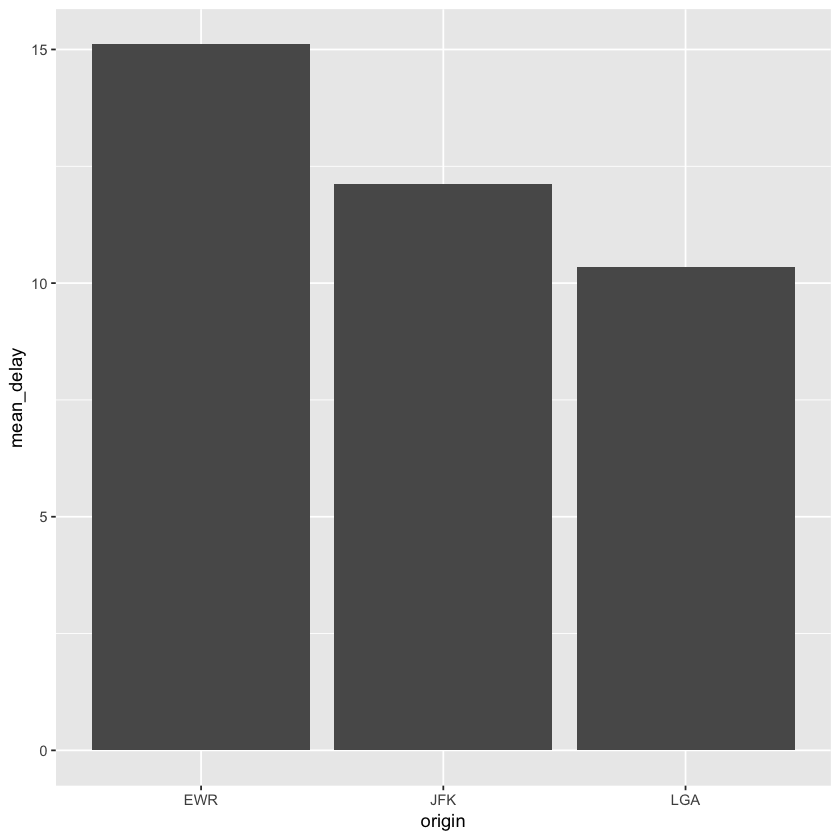

In [28]:
ggplot(avg_delay_origin, aes(x = origin, y = mean_delay)) +
  geom_bar(stat = "identity")

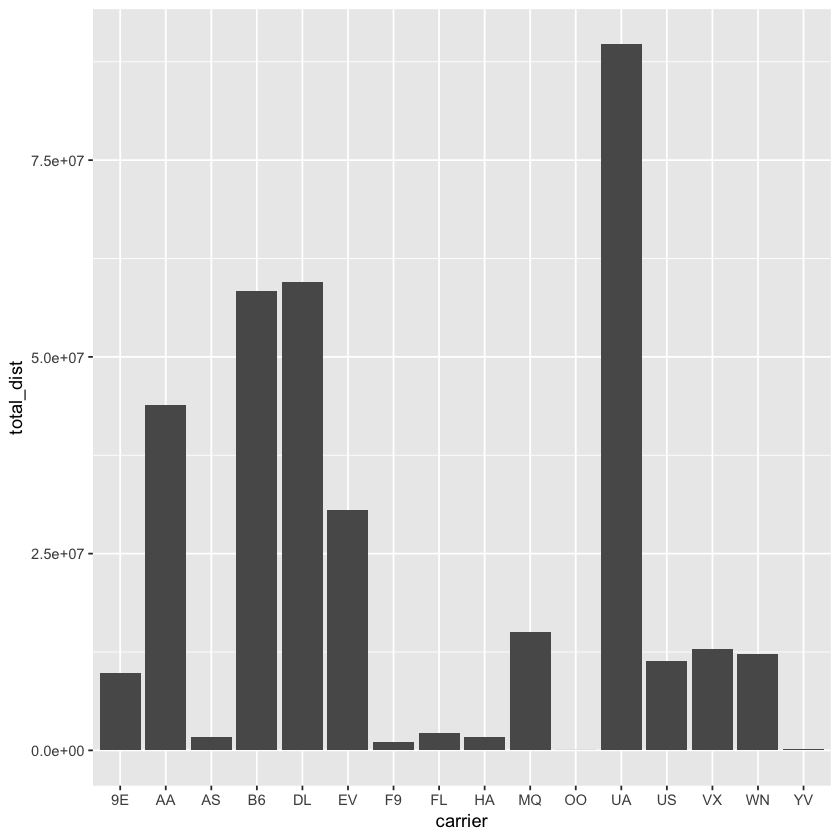

In [20]:
# ggplot assumes the first entry is a dataset and the second is a mapping
ggplot(carrier_dist, aes(x = carrier, y = total_dist)) +
  geom_bar(stat = "identity")   # stat = "identity" means we override the y-value for the bar graph

Attempt: Graph the average delay for each origin airport

We can also ungroup a grouped dataset

In [29]:
by_day <- flights %>%
   group_by(year, month, day) %>%
   print()

# A tibble: 336,776 x 19
# Groups:   year, month, day [365]
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      533            529         4      850            830
 3  2013     1     1      542            540         2      923            850
 4  2013     1     1      544            545        -1     1004           1022
 5  2013     1     1      554            600        -6      812            837
 6  2013     1     1      554            558        -4      740            728
 7  2013     1     1      555            600        -5      913            854
 8  2013     1     1      557            600        -3      709            723
 9  2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753        

In [30]:
by_day %>%
  ungroup() %>%
  print()

# A tibble: 336,776 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      533            529         4      850            830
 3  2013     1     1      542            540         2      923            850
 4  2013     1     1      544            545        -1     1004           1022
 5  2013     1     1      554            600        -6      812            837
 6  2013     1     1      554            558        -4      740            728
 7  2013     1     1      555            600        -5      913            854
 8  2013     1     1      557            600        -3      709            723
 9  2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753            745
# … with 336,766 more rows,

```summarize``` will successively peel off groupings

In [31]:
by_day <- group_by(flights, year, month, day)
per_day   <- summarize(by_day, num_flights = n())
print(per_day)

# A tibble: 365 x 4
# Groups:   year, month [12]
    year month   day num_flights
   <int> <int> <int>       <int>
 1  2013     1     1         842
 2  2013     1     2         943
 3  2013     1     3         914
 4  2013     1     4         915
 5  2013     1     5         720
 6  2013     1     6         832
 7  2013     1     7         933
 8  2013     1     8         899
 9  2013     1     9         902
10  2013     1    10         932
# … with 355 more rows


In [33]:
per_month <- summarize(per_day, num_flights = sum(num_flights))
print(per_month)

# A tibble: 12 x 3
# Groups:   year [1]
    year month num_flights
   <int> <int>       <int>
 1  2013     1       27004
 2  2013     2       24951
 3  2013     3       28834
 4  2013     4       28330
 5  2013     5       28796
 6  2013     6       28243
 7  2013     7       29425
 8  2013     8       29327
 9  2013     9       27574
10  2013    10       28889
11  2013    11       27268
12  2013    12       28135


In [34]:
per_year  <- summarize(per_month, num_flights = sum(num_flights))
 print(per_year)

# A tibble: 1 x 2
   year num_flights
  <int>       <int>
1  2013      336776


In [35]:
print(flights, width = 500)

# A tibble: 336,776 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      533            529         4      850            830
 3  2013     1     1      542            540         2      923            850
 4  2013     1     1      544            545        -1     1004           1022
 5  2013     1     1      554            600        -6      812            837
 6  2013     1     1      554            558        -4      740            728
 7  2013     1     1      555            600        -5      913            854
 8  2013     1     1      557            600        -3      709            723
 9  2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753            745
   arr_delay carrier flight

Create a dataset with the number of flights going into each destination
- Bonus: Arrange the rows by the number of flights

In [39]:
flights %>%
  group_by(dest) %>%
  summarize(num_flights = n()) %>%
  arrange(desc(num_flights)) %>%
  print()

# A tibble: 105 x 2
   dest  num_flights
   <chr>       <int>
 1 ORD         17283
 2 ATL         17215
 3 LAX         16174
 4 BOS         15508
 5 MCO         14082
 6 CLT         14064
 7 SFO         13331
 8 FLL         12055
 9 MIA         11728
10 DCA          9705
# … with 95 more rows
